In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_sst = "/work/Katherine.Turner/tempest-extremes/odiv-251/comp_tos/comp_tos_anom_static.nc"
ds_sst = xr.open_dataset(file_sst, use_cftime=True)

file_mld = "/work/Katherine.Turner/tempest-extremes/odiv-251/comp_omldamax/impulse_comp_omldamax_anom.nc"
ds_mld = xr.open_dataset(file_mld, use_cftime=True)

In [3]:
file_dic = "/work4/k2t/tempest-extremes/CM4_daily_rerun/comp_DIC_anom_static.nc"
ds_dic = xr.open_dataset(file_dic, use_cftime=True)

In [4]:
def mask_composite(ds, var, start_year=0, min_lat=-90, max_lat=90, min_lon=0, max_lon=360):
    X = np.meshgrid(ds.x.data,ds.y.data)
    mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])
    
    idx_region = (ds.snap_time.dt.year > start_year) & (ds.snap_lat >= min_lat) & (ds.snap_lat <= max_lat) & \
    (ds.snap_lon >= min_lon) & (ds.snap_lon <= max_lon)
    
    test = ds[var][idx_region,:,:]
    test = xr.where(abs(test)>1e10, np.nan, test)
    test = xr.where(test==0, np.nan, test)

    out_masked = xr.where(mask, test, np.nan)
    return out_masked

In [7]:
sst_masked = mask_composite(ds_sst, 'snap_tos_anom')
mld_masked = mask_composite(ds_mld, 'snap_omldamax_anom')
dic_masked = mask_composite(ds_dic, 'snap_DIC_anom')

In [10]:
idx_full = np.arange(ds_sst.snap_time.shape[0])

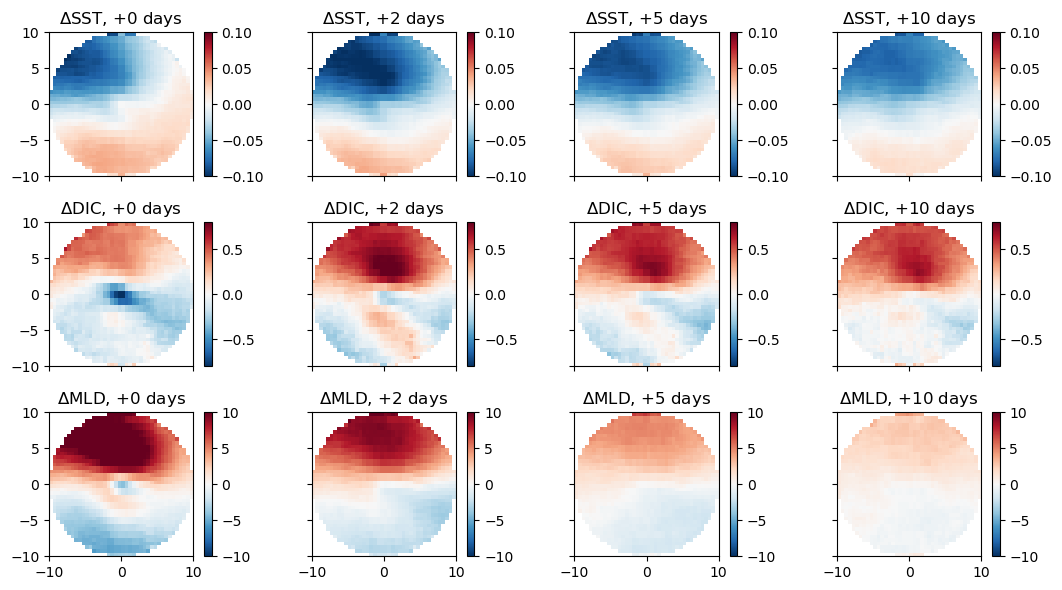

In [26]:
fig, axs = plt.subplots(nrows=3,ncols=4, figsize = (11,6), sharex=True, sharey=True)
axs=axs.flatten()

ndays = [0, 2, 5, 10]

for i,day in enumerate(ndays):
    idx = (idx_full % 11 == day)
    
    sst_masked[:,:,idx].mean(dim="snapshot",skipna=True).plot(ax=axs[i], y='y', vmin=-.1, vmax=.1, extend="neither", cmap="RdBu_r")
    (1e3 * dic_masked[:,:,idx]).mean(dim="snapshot",skipna=True).plot(ax=axs[i+4], y='y', vmin=-.8, vmax=.8, extend="neither", cmap="RdBu_r")
    mld_masked[:,:,idx].mean(dim="snapshot",skipna=True).plot(ax=axs[i+8], y='y', vmin=-10, vmax=10, extend="neither", cmap="RdBu_r")
    
    axs[i].set_title(f"$\Delta$SST, +{day} days")
    axs[i+4].set_title(f"$\Delta$DIC, +{day} days")
    axs[i+8].set_title(f"$\Delta$MLD, +{day} days")
    
for i in np.arange(12):
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_aspect(1)
    
plt.tight_layout()
plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/storm_impulse_upper_ocean.png",
           format="png",
           dpi=100,
           bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/composite_ocean_surface/storm_impulse_upper_ocean.png",
           format="png",
           dpi=100,
           bbox_inches="tight")

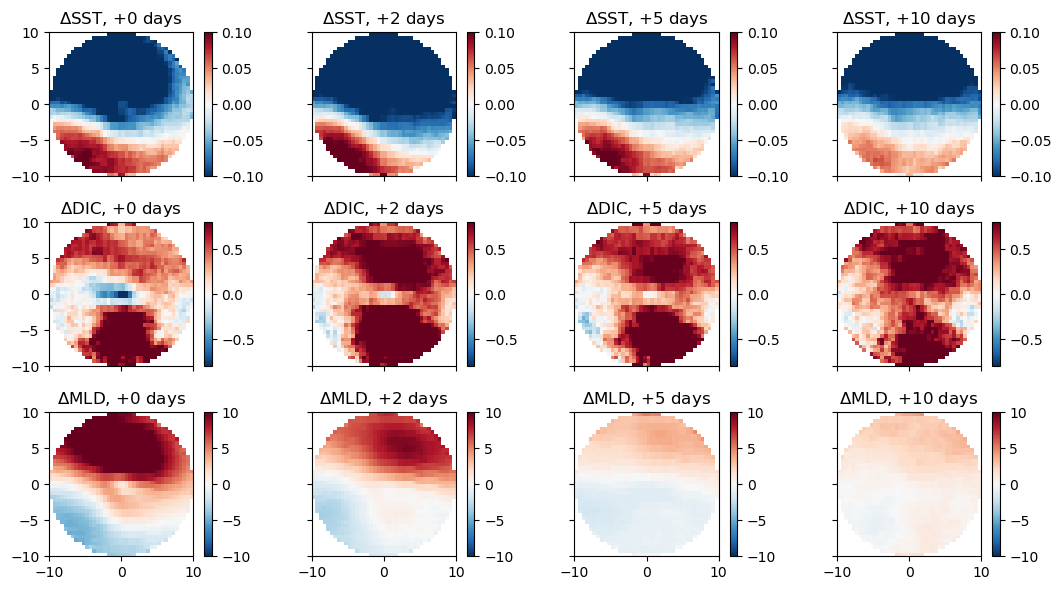

In [28]:
fig, axs = plt.subplots(nrows=3,ncols=4, figsize = (11,6), sharex=True, sharey=True)
axs=axs.flatten()

ndays = [0, 2, 5, 10]

for i,day in enumerate(ndays):
    idx = ((idx_full % 11 == day) & (ds_sst.snap_time.dt.month == 11))
    
    sst_masked[:,:,idx].mean(dim="snapshot",skipna=True).plot(ax=axs[i], y='y', vmin=-.1, vmax=.1, extend="neither", cmap="RdBu_r")
    (1e3 * dic_masked[:,:,idx]).mean(dim="snapshot",skipna=True).plot(ax=axs[i+4], y='y', vmin=-.8, vmax=.8, extend="neither", cmap="RdBu_r")
    mld_masked[:,:,idx].mean(dim="snapshot",skipna=True).plot(ax=axs[i+8], y='y', vmin=-10, vmax=10, extend="neither", cmap="RdBu_r")
    
    axs[i].set_title(f"$\Delta$SST, +{day} days")
    axs[i+4].set_title(f"$\Delta$DIC, +{day} days")
    axs[i+8].set_title(f"$\Delta$MLD, +{day} days")
    
for i in np.arange(12):
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_aspect(1)
    
plt.tight_layout()
plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/storm_impulse_upper_ocean_Nov.png",
           format="png",
           dpi=100,
           bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/composite_ocean_surface/storm_impulse_upper_ocean_Nov.png",
           format="png",
           dpi=100,
           bbox_inches="tight")